In [31]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
n_task_per_file = 50
n_files = 10
base_dir = "vary_signa_G_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [33]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [34]:
oper_char_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,1.000000,3.319971,1.315701,RRT,1.0
1,1.000000,19.169593,1.189488,Tree-Values,1.0
2,1.000000,2.703233,4.111642,RRT,2.0
3,0.857143,29.266777,4.267367,Tree-Values,2.0
4,0.800000,4.264942,25.836700,RRT,5.0
...,...,...,...,...,...
395,1.000000,11.742137,4.451864,Tree-Values,2.0
396,1.000000,6.782123,26.897153,RRT,5.0
397,1.000000,36.924821,28.849769,Tree-Values,5.0
398,0.833333,20.254194,104.238207,RRT,10.0


In [35]:
oper_char_df.index = range(oper_char_df.shape[0])

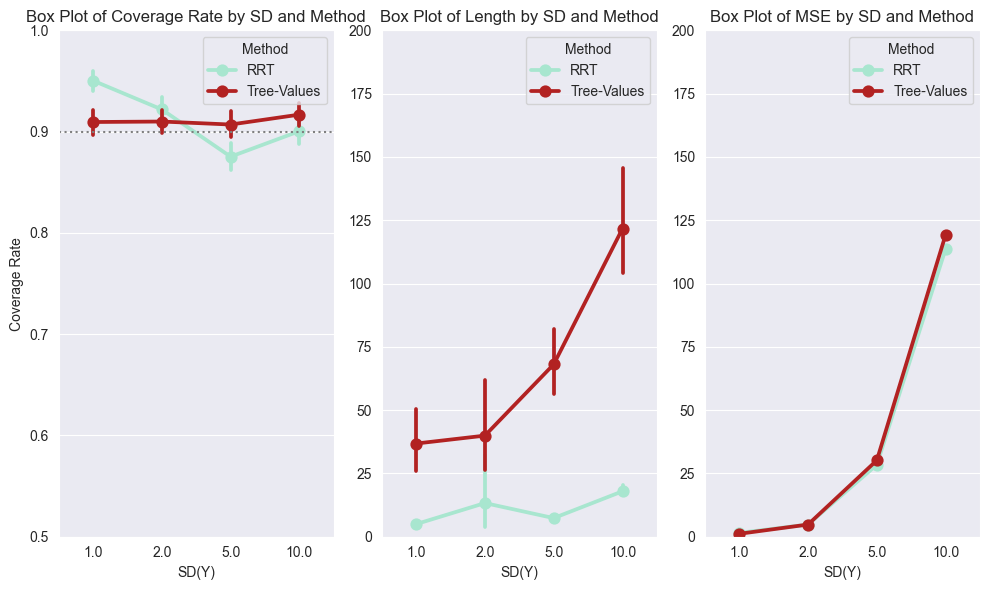

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 6), sharey=False)

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=["#A8E6CF", "#B22222"])
    axes[i].set_title(f'Box Plot of {metric} by SD and Method')
    axes[i].set_xlabel('SD(Y)')
    axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.5,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,200)
    elif metric == "MSE":
        axes[i].set_ylim(0,200)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [53]:
means = oper_char_df.groupby(["SD(Y)", 'Method'])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,SD(Y),Method,Coverage Rate,Length,MSE
0,1.0,RRT,0.950419,4.984903,1.511100
1,1.0,Tree-Values,0.909536,36.812031,1.156438
2,2.0,RRT,0.921924,13.293699,4.817113
3,2.0,Tree-Values,0.910012,39.939313,4.810029
4,5.0,RRT,0.875310,7.359325,28.435801
5,5.0,Tree-Values,0.907052,68.100287,30.176717
6,10.0,RRT,0.900505,17.946127,113.688811
7,10.0,Tree-Values,0.916850,inf,119.286684


In [43]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [44]:
oper_char_df[tree_flag].groupby(['SD(Y)'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,SD(Y),proportion_infinity
0,1.0,0.000
1,2.0,0.000
2,5.0,0.000
3,10.0,0.004
